#  Visualización de datos

## Cargue de paquetes

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import stylecloud

## Manejo de Bases de datos

In [2]:
df_2002 = pd.read_csv(r'Raw/Uribe_2002.csv', sep=",", index_col=0)
column_names=["word", 1, 2, 3, 4, 5, "total_2002"]
df_2002.columns = column_names
df_2002

,word,1,2,3,4,5,total_2002
0,the,140.0,12.0,3.0,1.0,1.0,157.0
1,of,53.0,0.0,0.0,1.0,0.0,54.0
2,ustedes,52.0,0.0,142.0,106.0,116.0,416.0
3,and,52.0,0.0,0.0,0.0,0.0,52.0
4,social,49.0,0.0,56.0,56.0,61.0,222.0
...,...,...,...,...,...,...,...
12767,sucedido,0.0,0.0,0.0,0.0,1.0,1.0
12768,regulares,0.0,0.0,0.0,0.0,1.0,1.0
12769,hiciéramos,0.0,0.0,0.0,0.0,1.0,1.0
12770,medir,0.0,0.0,0.0,0.0,1.0,1.0


In [3]:
df_2003 = pd.read_csv(r'Raw/Uribe_2003.csv', sep=",", index_col=0)
column_names=["word", 11, 12, 13, 14, 15, 16, 17, 6, 7, 8, 9, 10, "total_2003"]
df_2003.columns = column_names
df_2003

,word,11,12,13,14,15,16,17,6,7,8,9,10,total_2003
0,colombia,107.0,55.0,56.0,71.0,51.0,61.0,25.0,67.0,32.0,22.0,74.0,67.0,688.0
1,ustedes,68.0,27.0,76.0,82.0,49.0,70.0,44.0,60.0,46.0,8.0,34.0,66.0,630.0
2,país,50.0,32.0,24.0,33.0,45.0,29.0,25.0,55.0,47.0,25.0,49.0,24.0,438.0
3,social,49.0,25.0,38.0,45.0,48.0,33.0,21.0,71.0,67.0,8.0,49.0,11.0,465.0
4,mil,48.0,41.0,37.0,56.0,51.0,52.0,39.0,81.0,45.0,0.0,42.0,12.0,504.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13751,lentitud,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
13752,doblarse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
13753,inaugurar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
13754,cerros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [4]:
df_2004 = pd.read_csv(r'Raw/Uribe_2004.csv', sep=",", index_col=0)
column_names=["word", 18, 19, 20, 21, 23, 24, 25, 22, 27, 28, 29, 26, "total_2004"]
df_2004.columns = column_names
df_2004

,word,18,19,20,21,23,24,25,22,27,28,29,26,total_2004
0,gobierno,68.0,99.0,56.0,35.0,99.0,76.0,57.0,26.0,93.0,42.0,18.0,73.0,742.0
1,ustedes,58.0,84.0,41.0,17.0,29.0,32.0,69.0,19.0,35.0,12.0,45.0,26.0,467.0
2,mil,49.0,67.0,34.0,40.0,66.0,64.0,31.0,15.0,61.0,14.0,34.0,34.0,509.0
3,año,44.0,66.0,49.0,49.0,82.0,76.0,42.0,23.0,59.0,36.0,34.0,76.0,636.0
4,nacional,44.0,58.0,21.0,13.0,15.0,13.0,13.0,1.0,27.0,18.0,5.0,25.0,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13109,ciclista,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
13110,burrito,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
13111,ciclorutas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
13112,ríonegro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [5]:
df_2005 = pd.read_csv(r'Raw/Uribe_2005.csv', sep=",", index_col=0)
column_names=["word", 30, 31, 32, 34, 33, 37, 38, 39, 35, 41, 36, 40, "total_2005"]
df_2005.columns = column_names
df_2005

,word,30,31,32,34,33,37,38,39,35,41,36,40,total_2005
0,mil,73.0,106.0,23.0,66.0,92.0,89.0,32.0,41.0,28.0,28.0,52.0,127.0,757.0
1,año,72.0,113.0,29.0,47.0,54.0,106.0,60.0,68.0,41.0,48.0,49.0,97.0,784.0
2,gobierno,57.0,97.0,60.0,49.0,108.0,103.0,66.0,93.0,64.0,30.0,56.0,111.0,894.0
3,colombia,53.0,89.0,90.0,47.0,110.0,110.0,104.0,91.0,53.0,36.0,58.0,100.0,941.0
4,ustedes,51.0,66.0,15.0,30.0,43.0,73.0,54.0,80.0,35.0,21.0,91.0,56.0,615.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15767,debida,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
15768,ornamentación,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
15769,engalanamiento,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
15770,asombre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [6]:
df_2006 = pd.read_csv(r'Raw/Uribe_2006.csv', sep=",", index_col=0)
column_names=["word", 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 50, "total_2006"]
df_2006.columns = column_names
df_2006

,word,42,43,44,45,46,47,48,49,51,52,53,50,total_2006
0,gobierno,119.0,106.0,180.0,165.0,67.0,51.0,131.0,115.0,87.0,53.0,24.0,110.0,1208.0
1,país,100.0,47.0,101.0,123.0,53.0,66.0,78.0,121.0,55.0,150.0,55.0,110.0,1059.0
2,colombia,91.0,96.0,142.0,254.0,155.0,48.0,113.0,97.0,50.0,174.0,75.0,72.0,1367.0
3,mil,91.0,37.0,70.0,107.0,48.0,17.0,50.0,29.0,77.0,120.0,57.0,81.0,784.0
4,año,88.0,35.0,64.0,79.0,50.0,21.0,50.0,48.0,62.0,115.0,91.0,76.0,779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16398,vincularon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
16399,colocadores,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
16400,respalda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
16401,facilitarles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [7]:
df_2007_1 = pd.read_csv(r'Raw/Uribe_2007_1.csv', sep=",", index_col=0)
column_names=["word", 60, 54, 55, 58, 56, 57, 59, "total_2007_1"]
df_2007_1.columns = column_names
df_2007_1

,word,60,54,55,58,56,57,59,total_2007_1
0,gobierno,393.0,54.0,228.0,363.0,104.0,150.0,321.0,1613.0
1,colombia,373.0,204.0,182.0,181.0,144.0,119.0,170.0,1373.0
2,país,341.0,125.0,201.0,173.0,104.0,82.0,273.0,1299.0
3,mil,287.0,65.0,77.0,157.0,99.0,64.0,158.0,907.0
4,año,256.0,84.0,124.0,173.0,92.0,69.0,166.0,964.0
...,...,...,...,...,...,...,...,...,...
18153,dialéctica,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
18154,disfrazan,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
18155,despachar,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
18156,solicita,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [8]:
df_2007_2 = pd.read_csv(r'Raw/Uribe_2007_2.csv', sep=",", index_col=0)
column_names=["word", 61, 62, 63, 64, 65, "total_2007_2"]
df_2007_2.columns = column_names
df_2007_2

,word,61,62,63,64,65,total_2007_2
0,social,128.0,212.0,437.0,660.0,132.0,1569.0
1,colombia,126.0,209.0,473.0,678.0,223.0,1709.0
2,gobierno,109.0,218.0,596.0,626.0,346.0,1895.0
3,seguridad,107.0,162.0,261.0,509.0,151.0,1190.0
4,mãs,99.0,277.0,438.0,481.0,140.0,1435.0
...,...,...,...,...,...,...,...
15765,billetes,0.0,0.0,0.0,0.0,1.0,1.0
15766,reproduciendo,0.0,0.0,0.0,0.0,1.0,1.0
15767,bravucones,0.0,0.0,0.0,0.0,1.0,1.0
15768,complacientes,0.0,0.0,0.0,0.0,1.0,1.0


In [9]:
df_2008 = pd.read_csv(r'Raw/Uribe_2008.csv', sep=",", index_col=0)
column_names=["word", 69, 67, 71, 68, 72, 70, 75, 76, 73, 77, 74, 66, "total_2008"]
df_2008.columns = column_names
df_2008

,word,69,67,71,68,72,70,75,76,73,77,74,66,total_2008
0,colombia,363.0,140.0,322.0,290.0,131.0,345.0,653.0,397.0,320.0,298.0,332.0,184.0,3775.0
1,gobierno,315.0,142.0,379.0,207.0,130.0,227.0,613.0,449.0,206.0,391.0,360.0,144.0,3563.0
2,social,278.0,104.0,188.0,139.0,108.0,270.0,447.0,225.0,272.0,239.0,268.0,80.0,2618.0
3,seguridad,235.0,78.0,255.0,147.0,93.0,230.0,340.0,256.0,191.0,196.0,250.0,80.0,2351.0
4,mãs,225.0,111.0,278.0,185.0,152.0,221.0,572.0,372.0,320.0,332.0,315.0,91.0,3174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22957,renovemos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
22958,primavera,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
22959,floreciente,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
22960,insinuado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [10]:
df_2009 = pd.read_csv(r'Raw/Uribe_2009.csv', sep=",", index_col=0)
column_names=["word", 78, 81, 79, 82, 84, 80, 85, 83, 89, 86, 87, 88, "total_2009"]
df_2009.columns = column_names
df_2009

,word,78,81,79,82,84,80,85,83,89,86,87,88,total_2009
0,mil,175.0,214.0,373.0,372.0,440.0,321.0,370.0,402.0,232.0,466.0,577.0,321.0,4263.0
1,colombia,124.0,259.0,381.0,493.0,366.0,430.0,366.0,367.0,245.0,557.0,821.0,574.0,4983.0
2,gran,114.0,153.0,316.0,362.0,328.0,221.0,269.0,350.0,189.0,333.0,430.0,356.0,3421.0
3,millones,110.0,159.0,275.0,279.0,245.0,253.0,195.0,228.0,92.0,262.0,295.0,198.0,2591.0
4,social,108.0,87.0,236.0,221.0,231.0,292.0,262.0,191.0,137.0,285.0,392.0,222.0,2664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23886,masificarlo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
23887,acertadamente,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
23888,quiebran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
23889,rezado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [11]:
df_2010 = pd.read_csv(r'Raw/Uribe_2010.csv', sep=",", index_col=0)
column_names=["word", 90, 92, 93, 91, 95, 94, "julio_2010", 96, "total_2010"]
df_2010.columns = column_names
df_2010=df_2010.drop(["julio_2010"], axis=1)
df_2010

,word,90,92,93,91,95,94,96,total_2010
0,colombia,104.0,509.0,566.0,179.0,602.0,752.0,981.0,3693.0
1,mil,87.0,305.0,338.0,158.0,257.0,411.0,405.0,1961.0
2,gran,82.0,355.0,430.0,122.0,471.0,517.0,948.0,2925.0
3,ciento,69.0,142.0,225.0,70.0,140.0,259.0,240.0,1145.0
4,salud,69.0,117.0,67.0,180.0,84.0,95.0,133.0,745.0
...,...,...,...,...,...,...,...,...,...
21441,piano,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21442,sonado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21443,maracas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21444,acordeones,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
years=[df_2003,df_2004,df_2005,df_2006,df_2007_1,df_2007_2,df_2008,df_2009, df_2010]
speeches=df_2002
for year in years: 
    speeches=speeches.merge(year, how="outer", on="word")
speeches

,word,1,2,3,4,5,total_2002,11,12,13,...,88,total_2009,90,92,93,91,95,94,96,total_2010
0,the,140.0,12.0,3.0,1.0,1.0,157.0,6.0,6.0,6.0,...,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,of,53.0,0.0,0.0,1.0,0.0,54.0,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,ustedes,52.0,0.0,142.0,106.0,116.0,416.0,68.0,27.0,76.0,...,171.0,1618.0,45.0,137.0,137.0,48.0,369.0,193.0,606.0,1535.0
3,and,52.0,0.0,0.0,0.0,0.0,52.0,NaN,NaN,NaN,...,1.0,2.0,0.0,0.0,0.0,0.0,2.0,23.0,3.0,28.0
4,social,49.0,0.0,56.0,56.0,61.0,222.0,49.0,25.0,38.0,...,222.0,2664.0,58.0,226.0,224.0,97.0,220.0,291.0,412.0,1528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54587,murales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54588,disolvieron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54589,piano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54590,sonado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
months = [*range(1, 97, 1)]
word=["word"]
columns=word+months
speeches_months=speeches[columns]
speeches_months=speeches_months.fillna(0)
speeches_months

,word,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,the,140.0,12.0,3.0,1.0,1.0,7.0,7.0,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,of,53.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,ustedes,52.0,0.0,142.0,106.0,116.0,60.0,46.0,8.0,34.0,...,216.0,171.0,97.0,45.0,48.0,137.0,137.0,193.0,369.0,606.0
3,and,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,2.0,3.0
4,social,49.0,0.0,56.0,56.0,61.0,71.0,67.0,8.0,49.0,...,392.0,222.0,137.0,58.0,97.0,226.0,224.0,291.0,220.0,412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54587,murales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54588,disolvieron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54589,piano,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54590,sonado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
murder = pd.read_csv(r'Raw/asesinatos_month.csv', sep=",", index_col=False)
murder

,year,mes,asesinatos_es,asesinatos_es_p,asesinatos_es_gd,asesinatos_estado_all,month
0,2002,8,22,2,0,24,1
1,2002,9,11,4,0,15,2
2,2002,10,15,4,0,19,3
3,2002,11,7,2,0,9,4
4,2002,12,4,1,0,5,5
...,...,...,...,...,...,...,...
91,2010,3,6,0,0,6,92
92,2010,4,3,0,0,3,93
93,2010,5,0,0,0,0,94
94,2010,6,1,0,0,1,95


In [15]:
DF=speeches_months.set_index('word')
DF=DF.T.reset_index()
DF

word,index,the,of,ustedes,and,social,colombia,to,recursos,estado,...,degenerativo,torpedo,alterarla,reforzarla,pintores,murales,disolvieron,piano,sonado,violines
0,1,140.0,53.0,52.0,52.0,49.0,48.0,47.0,44.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3.0,0.0,142.0,0.0,56.0,128.0,0.0,66.0,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,1.0,106.0,0.0,56.0,121.0,0.0,48.0,103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.0,0.0,116.0,0.0,61.0,101.0,0.0,26.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,0.0,0.0,137.0,0.0,226.0,509.0,0.0,81.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,0.0,1.0,137.0,0.0,224.0,566.0,0.0,84.0,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,94,0.0,0.0,193.0,23.0,291.0,752.0,0.0,136.0,171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,95,0.0,0.0,369.0,2.0,220.0,602.0,1.0,106.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
columns=DF.columns.to_list()
month=["month"]
columns=columns[1:]
new_columns=month+columns
df_2003 = pd.read_csv(r'Raw/Uribe_2003.csv', sep=",", index_col=0)
column_names=["word", 11, 12, 13, 14, 15, 16, 17, 6, 7, 8, 9, 10, "total_2003"]
DF.columns = new_columns
DF

,month,the,of,ustedes,and,social,colombia,to,recursos,estado,...,degenerativo,torpedo,alterarla,reforzarla,pintores,murales,disolvieron,piano,sonado,violines
0,1,140.0,53.0,52.0,52.0,49.0,48.0,47.0,44.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3.0,0.0,142.0,0.0,56.0,128.0,0.0,66.0,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,1.0,106.0,0.0,56.0,121.0,0.0,48.0,103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.0,0.0,116.0,0.0,61.0,101.0,0.0,26.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,0.0,0.0,137.0,0.0,226.0,509.0,0.0,81.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,0.0,1.0,137.0,0.0,224.0,566.0,0.0,84.0,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,94,0.0,0.0,193.0,23.0,291.0,752.0,0.0,136.0,171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,95,0.0,0.0,369.0,2.0,220.0,602.0,1.0,106.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
main_DB=DF.merge(murder, how="outer", on="month")
main_DB

,month,the,of,ustedes,and,social,colombia,to,recursos,estado,...,disolvieron,piano,sonado,violines,year_y,mes_y,asesinatos_es,asesinatos_es_p,asesinatos_es_gd,asesinatos_estado_all
0,1,140.0,53.0,52.0,52.0,49.0,48.0,47.0,44.0,43.0,...,0.0,0.0,0.0,0.0,2002,8,22,2,0,24
1,2,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2002,9,11,4,0,15
2,3,3.0,0.0,142.0,0.0,56.0,128.0,0.0,66.0,119.0,...,0.0,0.0,0.0,0.0,2002,10,15,4,0,19
3,4,1.0,1.0,106.0,0.0,56.0,121.0,0.0,48.0,103.0,...,0.0,0.0,0.0,0.0,2002,11,7,2,0,9
4,5,1.0,0.0,116.0,0.0,61.0,101.0,0.0,26.0,51.0,...,0.0,0.0,0.0,0.0,2002,12,4,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,0.0,0.0,137.0,0.0,226.0,509.0,0.0,81.0,86.0,...,0.0,0.0,0.0,0.0,2010,3,6,0,0,6
92,93,0.0,1.0,137.0,0.0,224.0,566.0,0.0,84.0,119.0,...,0.0,0.0,0.0,0.0,2010,4,3,0,0,3
93,94,0.0,0.0,193.0,23.0,291.0,752.0,0.0,136.0,171.0,...,0.0,0.0,0.0,0.0,2010,5,0,0,0,0
94,95,0.0,0.0,369.0,2.0,220.0,602.0,1.0,106.0,93.0,...,0.0,0.0,0.0,0.0,2010,6,1,0,0,1


In [18]:
speeches_total_m=speeches[["word","total_2002","total_2003","total_2004","total_2005","total_2006","total_2007_1","total_2007_2","total_2008","total_2009","total_2010"]]
speeches_total_m=speeches_total_m.fillna(0)
speeches_total_m["total"]=speeches_total_m["total_2002"]+speeches_total_m["total_2003"]+speeches_total_m["total_2004"]+speeches_total_m["total_2005"]+speeches_total_m["total_2006"]+speeches_total_m["total_2007_1"]+speeches_total_m["total_2007_2"]+speeches_total_m["total_2008"]+speeches_total_m["total_2009"]+speeches_total_m["total_2010"]
speeches_total_m=speeches_total_m[["word","total"]]
speeches_total_m=speeches_total_m.sort_values(by=['total'], ascending=False).reset_index(drop=True)
speeches_total_m = speeches_total_m.drop(speeches_total_m.index[0])
speeches_total_m=speeches_total_m.reset_index(drop=True)
speeches_total_m = speeches_total_m.drop(speeches_total_m.index[[1,2,3,6,7,9,10,14,15,18]])
speeches_total_m=speeches_total_m.reset_index(drop=True)
speeches_total_m = speeches_total_m.drop(speeches_total_m.index[[17,18]])
speeches_total_m=speeches_total_m.head(20)
speeches_total_m

,word,total
0,gobierno,17759.0
1,seguridad,11121.0
2,social,11043.0
3,millones,8996.0
4,presidente,7710.0
5,yo,7562.0
6,estado,7421.0
7,ciento,6756.0
8,bien,6666.0
9,tema,6558.0


## Visualización

In [46]:
db_2002 =speeches[["word","total_2002"]].sort_values(by=['total_2002'], ascending=False).reset_index(drop=True)
db_2002 = db_2002.drop(db_2002.index[[8,16]])
db_2002 = db_2002.reset_index(drop=True)
db_2002 = db_2002.drop(db_2002.index[[19,20]])
db_2002 = db_2002.reset_index(drop=True)
db_2002 = db_2002.head(20)

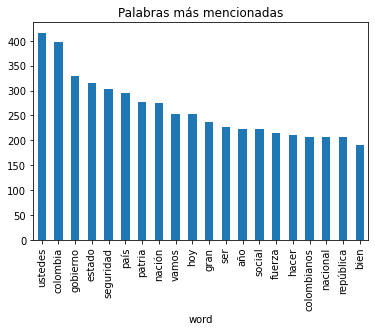

In [47]:
ax = db_2002.plot.bar(x='word', y='total_2002', rot=90).set(title='Palabras más mencionadas - 2002')
plt.legend([],[], frameon=False)
plt.savefig("Palabras_2002.png", dpi=250, bbox_inches='tight') 

In [54]:
db_2003 =speeches[["word","total_2003"]].sort_values(by=['total_2003'], ascending=False).reset_index(drop=True)
db_2003 = db_2003.drop(db_2003.index[[11,12,14]])
db_2003 = db_2003.reset_index(drop=True)
db_2003 = db_2003.head(20)

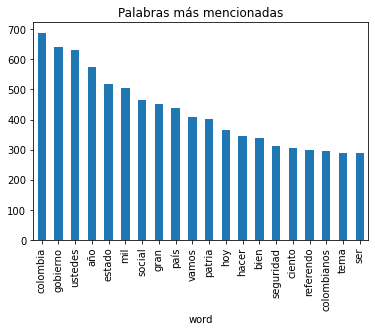

In [55]:
ax = db_2003.plot.bar(x='word', y='total_2003', rot=90).set(title='Palabras más mencionadas - 2003')
plt.legend([],[], frameon=False)
plt.savefig("Palabras_2003.png", dpi=250, bbox_inches='tight') 

In [58]:
db_2004 =speeches[["word","total_2004"]].sort_values(by=['total_2004'], ascending=False).reset_index(drop=True)
db_2004 = db_2004.drop(db_2004.index[[3,8,10]])
db_2004 = db_2004.reset_index(drop=True)
db_2004 = db_2004.head(20)

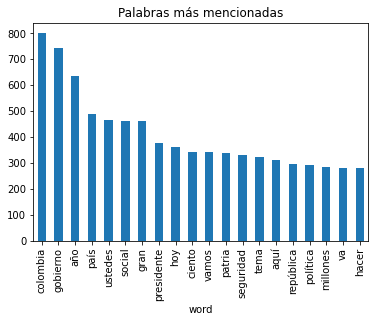

In [59]:
ax = db_2004.plot.bar(x='word', y='total_2004', rot=90).set(title='Palabras más mencionadas - 2004')
plt.legend([],[], frameon=False)
plt.savefig("Palabras_2004.png", dpi=250, bbox_inches='tight') 

In [66]:
db_2005 =speeches[["word","total_2005"]].sort_values(by=['total_2005'], ascending=False).reset_index(drop=True)
db_2005 = db_2005.drop(db_2005.index[[3,7,9]])
db_2005 = db_2005.reset_index(drop=True)
db_2005 = db_2005.drop(db_2005.index[[17,18]])
db_2005 = db_2005.reset_index(drop=True)
db_2005 = db_2005.head(20)

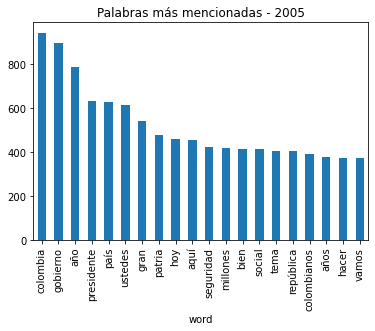

In [67]:
ax = db_2005.plot.bar(x='word', y='total_2005', rot=90).set(title='Palabras más mencionadas - 2005')
plt.legend([],[], frameon=False)
plt.savefig("Palabras_2005.png", dpi=250, bbox_inches='tight') 

In [72]:
db_2006 =speeches[["word","total_2006"]].sort_values(by=['total_2006'], ascending=False).reset_index(drop=True)
db_2006 = db_2006.drop(db_2006.index[[4,8,10,16]])
db_2006 = db_2006.reset_index(drop=True)
db_2006 = db_2006.drop(db_2006.index[[19]])
db_2006 = db_2006.reset_index(drop=True)
db_2006 = db_2006.head(20)

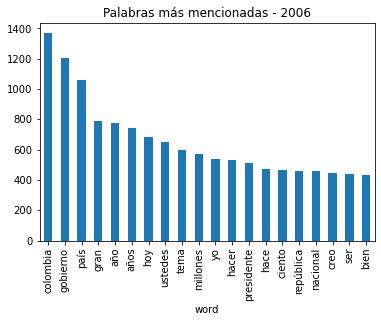

In [73]:
ax = db_2006.plot.bar(x='word', y='total_2006', rot=90).set(title='Palabras más mencionadas - 2006')
plt.legend([],[], frameon=False)
plt.savefig("Palabras_2006.png", dpi=250, bbox_inches='tight') 

In [87]:
db_2007 =speeches[["word","total_2007_1", "total_2007_2"]]
db_2007["total_2007"]=db_2007["total_2007_1"]+db_2007["total_2007_2"]
db_2007=db_2007[["word","total_2007"]].fillna(0)
db_2007 = db_2007.sort_values(by=['total_2007'], ascending=False).reset_index(drop=True)
db_2007 = db_2007.drop(db_2007.index[[8,10]])
db_2007 = db_2007.reset_index(drop=True)
db_2007 = db_2007.head(20)

<ipython-input-87-942c27cfc7a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_2007["total_2007"]=db_2007["total_2007_1"]+db_2007["total_2007_2"]


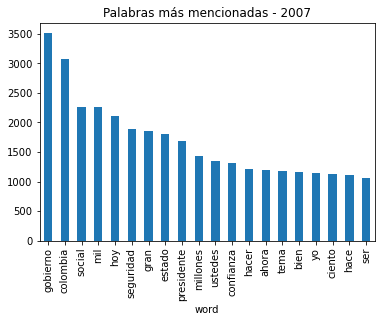

In [89]:
ax = db_2007.plot.bar(x='word', y='total_2007', rot=90).set(title='Palabras más mencionadas - 2007')
plt.legend([],[], frameon=False)
plt.savefig("Palabras_2007.png", dpi=250, bbox_inches='tight') 

In [94]:
db_2008 =speeches[["word","total_2008"]].sort_values(by=['total_2008'], ascending=False).reset_index(drop=True)
db_2008 = db_2008.drop(db_2008.index[[2,9,10,13]])
db_2008 = db_2008.reset_index(drop=True)
db_2008 = db_2008.head(20)

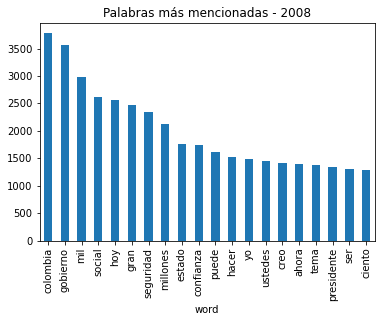

In [95]:
ax = db_2008.plot.bar(x='word', y='total_2008', rot=90).set(title='Palabras más mencionadas - 2008')
plt.legend([],[], frameon=False)
plt.savefig("Palabras_2008.png", dpi=250, bbox_inches='tight') 

In [100]:
db_2009 =speeches[["word","total_2009"]].sort_values(by=['total_2009'], ascending=False).reset_index(drop=True)
db_2009 = db_2009.drop(db_2009.index[[9,10,19]])
db_2009 = db_2009.reset_index(drop=True)
db_2009 = db_2009.head(20)

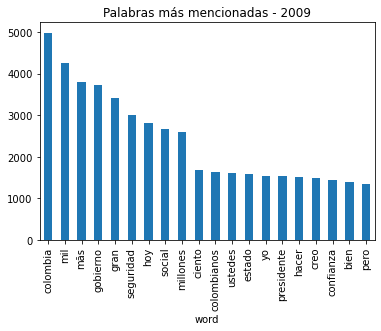

In [101]:
ax = db_2009.plot.bar(x='word', y='total_2009', rot=90).set(title='Palabras más mencionadas - 2009')
plt.legend([],[], frameon=False)
plt.savefig("Palabras_2009.png", dpi=250, bbox_inches='tight') 

In [103]:
db_2010 =speeches[["word","total_2010"]].sort_values(by=['total_2010'], ascending=False).reset_index(drop=True)
db_2010 = db_2010.drop(db_2010.index[[3,11,12,17]])
db_2010 = db_2010.reset_index(drop=True)
db_2010 = db_2010.head(20)

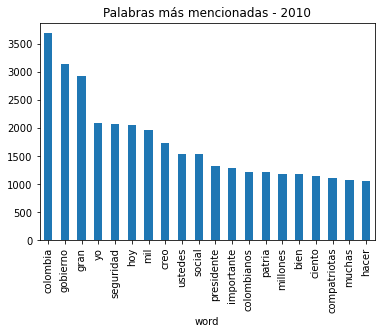

In [104]:
ax = db_2010.plot.bar(x='word', y='total_2010', rot=90).set(title='Palabras más mencionadas - 2010')
plt.legend([],[], frameon=False)
plt.savefig("Palabras_2010.png", dpi=250, bbox_inches='tight') 

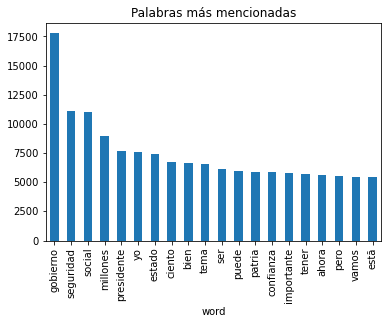

In [21]:
ax = speeches_total_m.plot.bar(x='word', y='total', rot=90).set(title='Palabras más mencionadas')
plt.legend([],[], frameon=False)
plt.savefig("Palabras.png", dpi=250, bbox_inches='tight') 

In [22]:
main_DB_copy=main_DB
main_DB=main_DB.set_index('month')
main_DB_asesinatos_es=main_DB[["asesinatos_es"]]
main_DB_asesinatos_es_p=main_DB[["asesinatos_es_p"]]
main_DB_asesinatos_es_gd=main_DB[["asesinatos_es_gd"]]
main_DB_asesinatos_estado_all=main_DB[["asesinatos_estado_all"]]
relacion_1=main_DB[["seguridad","asesinatos_estado_all"]]
relacion_2=main_DB[["guerrilla","asesinatos_estado_all"]]
relacion_3=main_DB[["criminales","asesinatos_estado_all"]]

In [23]:
main_DB_asesinatos_es

,asesinatos_es
month,
1,22
2,11
3,15
4,7
5,4
...,...
92,6
93,3
94,0


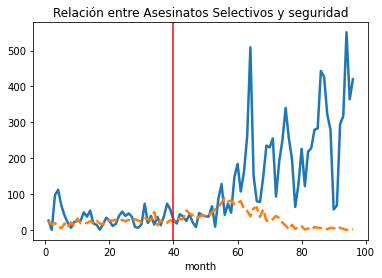

In [24]:
sns.lineplot(data=relacion_1, palette="tab10", linewidth=2.5).set(title='Relación entre Asesinatos Selectivos y seguridad')
plt.axvline(40, color='r')
plt.legend([],[], frameon=False)
plt.savefig("Relación_1.png", dpi=250, bbox_inches='tight') 

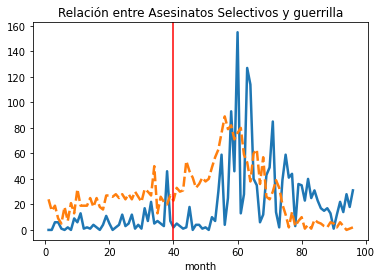

In [25]:
sns.lineplot(data=relacion_2, palette="tab10", linewidth=2.5).set(title='Relación entre Asesinatos Selectivos y guerrilla')
plt.axvline(40, color='r')
plt.legend([],[], frameon=False)
plt.savefig("Relación_2.png", dpi=250, bbox_inches='tight') 

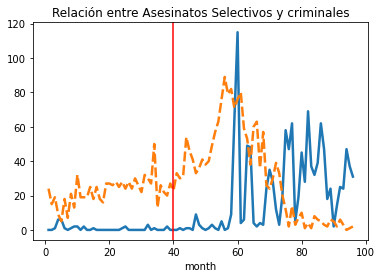

In [26]:
sns.lineplot(data=relacion_3, palette="tab10", linewidth=2.5).set(title="Relación entre Asesinatos Selectivos y criminales")
plt.axvline(40, color='r')
plt.legend([],[], frameon=False)
plt.savefig("Relación_3.png", dpi=250, bbox_inches='tight') 

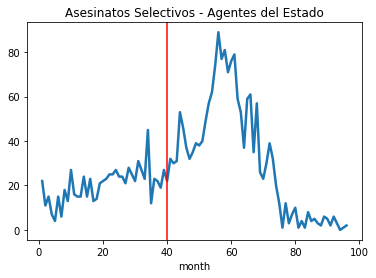

In [27]:
sns.lineplot(data=main_DB_asesinatos_es, palette="tab10", linewidth=2.5).set(title='Asesinatos Selectivos - Agentes del Estado')
plt.axvline(40, color='r')
plt.legend([],[], frameon=False)
plt.savefig("Asesinatos_1.png", dpi=250, bbox_inches='tight') 

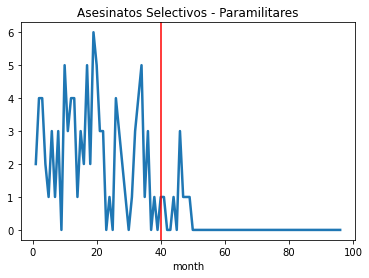

In [28]:
sns.lineplot(data=main_DB_asesinatos_es_p, palette="tab10", linewidth=2.5).set(title='Asesinatos Selectivos - Paramilitares')
plt.axvline(40, color='r')
plt.legend([],[], frameon=False)
plt.savefig("Asesinatos_2.png", dpi=250, bbox_inches='tight') 

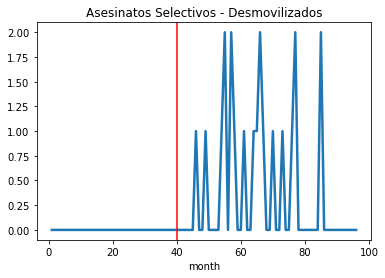

In [29]:
sns.lineplot(data=main_DB_asesinatos_es_gd, palette="tab10", linewidth=2.5).set(title='Asesinatos Selectivos - Desmovilizados')
plt.axvline(40, color='r')
plt.legend([],[], frameon=False)
plt.savefig("Asesinatos_3.png", dpi=250, bbox_inches='tight') 

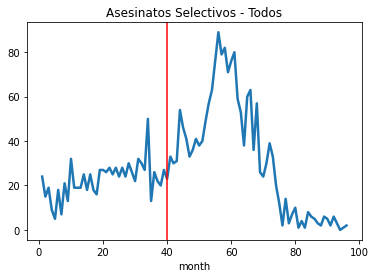

In [30]:
sns.lineplot(data=main_DB_asesinatos_estado_all, palette="tab10", linewidth=2.5).set(title='Asesinatos Selectivos - Todos')
plt.axvline(40, color='r')
plt.legend([],[], frameon=False)
plt.savefig("Asesinatos_4.png", dpi=250, bbox_inches='tight') 

In [31]:
DF=speeches_months.set_index('word')
DF=DF.T.reset_index()
DF=DF[["seguridad", "guerrilla", "defensa"]]
DF_seguridad=DF[["seguridad"]]
DF_guerrilla=DF[["guerrilla"]]

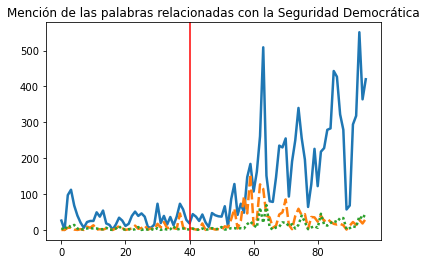

In [32]:
sns.lineplot(data=DF, palette="tab10", linewidth=2.5).set(title='Mención de las palabras relacionadas con la Seguridad Democrática')
plt.axvline(40, color='r')
plt.legend([],[], frameon=False)
plt.savefig("Mención_Todas.png", dpi=250, bbox_inches='tight') 

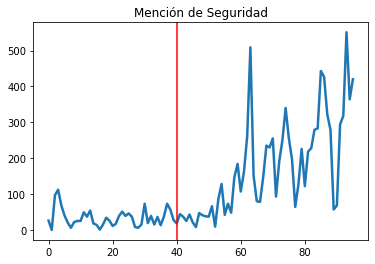

In [33]:
sns.lineplot(data=DF_seguridad, palette="tab10", linewidth=2.5).set(title='Mención de Seguridad')
plt.axvline(40, color='r')
plt.legend([],[], frameon=False)
plt.savefig("Mención_Seguridad.png", dpi=250, bbox_inches='tight') 

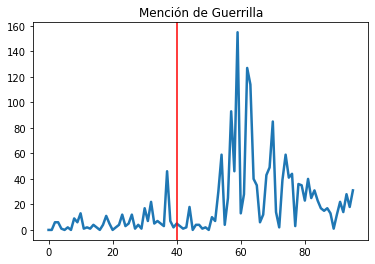

In [34]:
sns.lineplot(data=DF_guerrilla, palette="tab10", linewidth=2.5).set(title='Mención de Guerrilla')
plt.axvline(40, color='r')
plt.legend([],[], frameon=False)
plt.savefig("Mención_Guerrilla.png", dpi=250, bbox_inches='tight') 